In [1]:
import numpy as np
import pandas as pd
import os

In [81]:
year = 1950

In [82]:
path = '../data/deuxième_partie/le_peuple/'
txts = [f for f in os.listdir(path) if os.path.isfile(os.path.join(path, f)) and str(year) in f]

In [83]:
content_list = []
for txt in txts:
    with open(os.path.join(path, txt), 'r', encoding="utf-8") as f:
        content_list.append(f.read())

In [84]:
temp_path = '../data/deuxième_partie/la_libre_belgique/'
if not os.path.exists(temp_path):
    os.mkdir(temp_path)
with open(os.path.join(temp_path, f'{year}.txt'), 'w', encoding="utf-8") as f:
    f.write(' '.join(content_list))

In [85]:
#imports
from collections import Counter
from wordcloud import WordCloud
import os
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from IPython.display import Image

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [114]:
sw = stopwords.words("french")
sw += ["les", "plus", "cette", "fait", "faire", "être", "deux", "comme", "dont", "tout",
       "ils", "bien", "sans", "peut", "tous", "après", "ainsi", "donc", "cet", "sous",
       "celle", "entre", "encore", "toutes", "pendant", "moins", "dire", "cela", "non",
       "faut", "trois", "aussi", "dit", "avoir", "doit", "contre", "depuis", "autres",
       "van", "het", "autre", "jusqu", "ville", "rossel", "dem", "très", "tel", "Brux", 
       "Mod", "mois", "cours", "centre", "lundi", "mardi", "mercredi", "jeudi", "vendredi", 
       "samedi", "dimanche", "jour", "jard", "ref", "etc", "culs", "chez", "mal", "bel",
       "toute", "janvier", "février", "mars", "avril", "mai", "juin", "juillet", "aout", 
       "septembre", "octobre", "novembre", "decembre", "confs", "temps", "francs", "brux",
       "ans", "pet", "pers", "ans", "rue", "tel", "louer", "suite", "ecr", "vente", "leur", 
       "leurs", "jean", "gros", "refer", "orch", "ref", "mme", "quelques", "AOUT", "nord", 
       "midi", "fille", "mme", "app", "soir", "avant", "réf", "déja", "francs", "pres", "rez",
       "vis", "conf", "louis", "louise", "paul", "franc", "meub", "cap", "enf", "conf", 
       "déjà", "ref", "pierre", "ceux", "age", "adr", "semaine", "inst", "bon", "heure", 
       "aven", "sal", "vers", "trav", "mans", "grand", "celui", "toujours", "alors", "tant", 
       "jour", "fin", "parmi", "part", "enfin", "elles", "rien", 
       ]
sw = set(sw)

In [115]:
year = 1930

In [116]:
#création d'une fonction de 'cleaning'
def clean_text(year, folder=None):
    if folder is None:
        input_path = f"{year}.txt"
        output_path = f"{year}_clean.txt"
    else:
        input_path = f"{folder}/{year}.txt"
        output_path = f"{folder}/{year}_clean.txt"
    output = open(output_path, "w", encoding='utf-8')
    with open(input_path, 'r', encoding='utf-8') as f:
        text = f.read()
        words = nltk.wordpunct_tokenize(text)
        kept = [w.upper() for w in words if len(w) > 2 and w.isalpha() and w.lower() not in sw]
        kept_string = " ".join(kept)
        output.write(kept_string)
    return f'Output has been written in {output_path}'

In [117]:
path = '../data/deuxième_partie/'
clean_text(year, folder = path)

'Output has been written in ../data/deuxième_partie//1930_clean.txt'

In [118]:
with open(os.path.join(path, f'{year}_clean.txt'), 'r', encoding='utf-8') as f:
    after = f.read()

In [119]:
frequencies = Counter(after.split())
print(frequencies.most_common(30))

[('GOUVERNEMENT', 6284), ('PAYS', 5221), ('PARTI', 4077), ('GUERRE', 3990), ('MINISTRE', 3938), ('POLITIQUE', 3711), ('TRAVAIL', 3407), ('PAGE', 3266), ('BELGIQUE', 3243), ('SOCIALISTE', 3217), ('PEUPLE', 3194), ('BRUXELLES', 3053), ('VOIR', 3047), ('PEU', 2629), ('GRANDE', 2607), ('GÉNÉRAL', 2581), ('SOCIALISTES', 2537), ('CONSEIL', 2513), ('MATIN', 2503), ('FRANCE', 2453), ('PREMIER', 2418), ('BELGE', 2402), ('DEVANT', 2387), ('ETAT', 2325), ('HEURES', 2285), ('QUESTION', 2281), ('PRIX', 2240), ('ELLES', 2178), ('PRÉSIDENT', 2154), ('MILLIONS', 2104)]


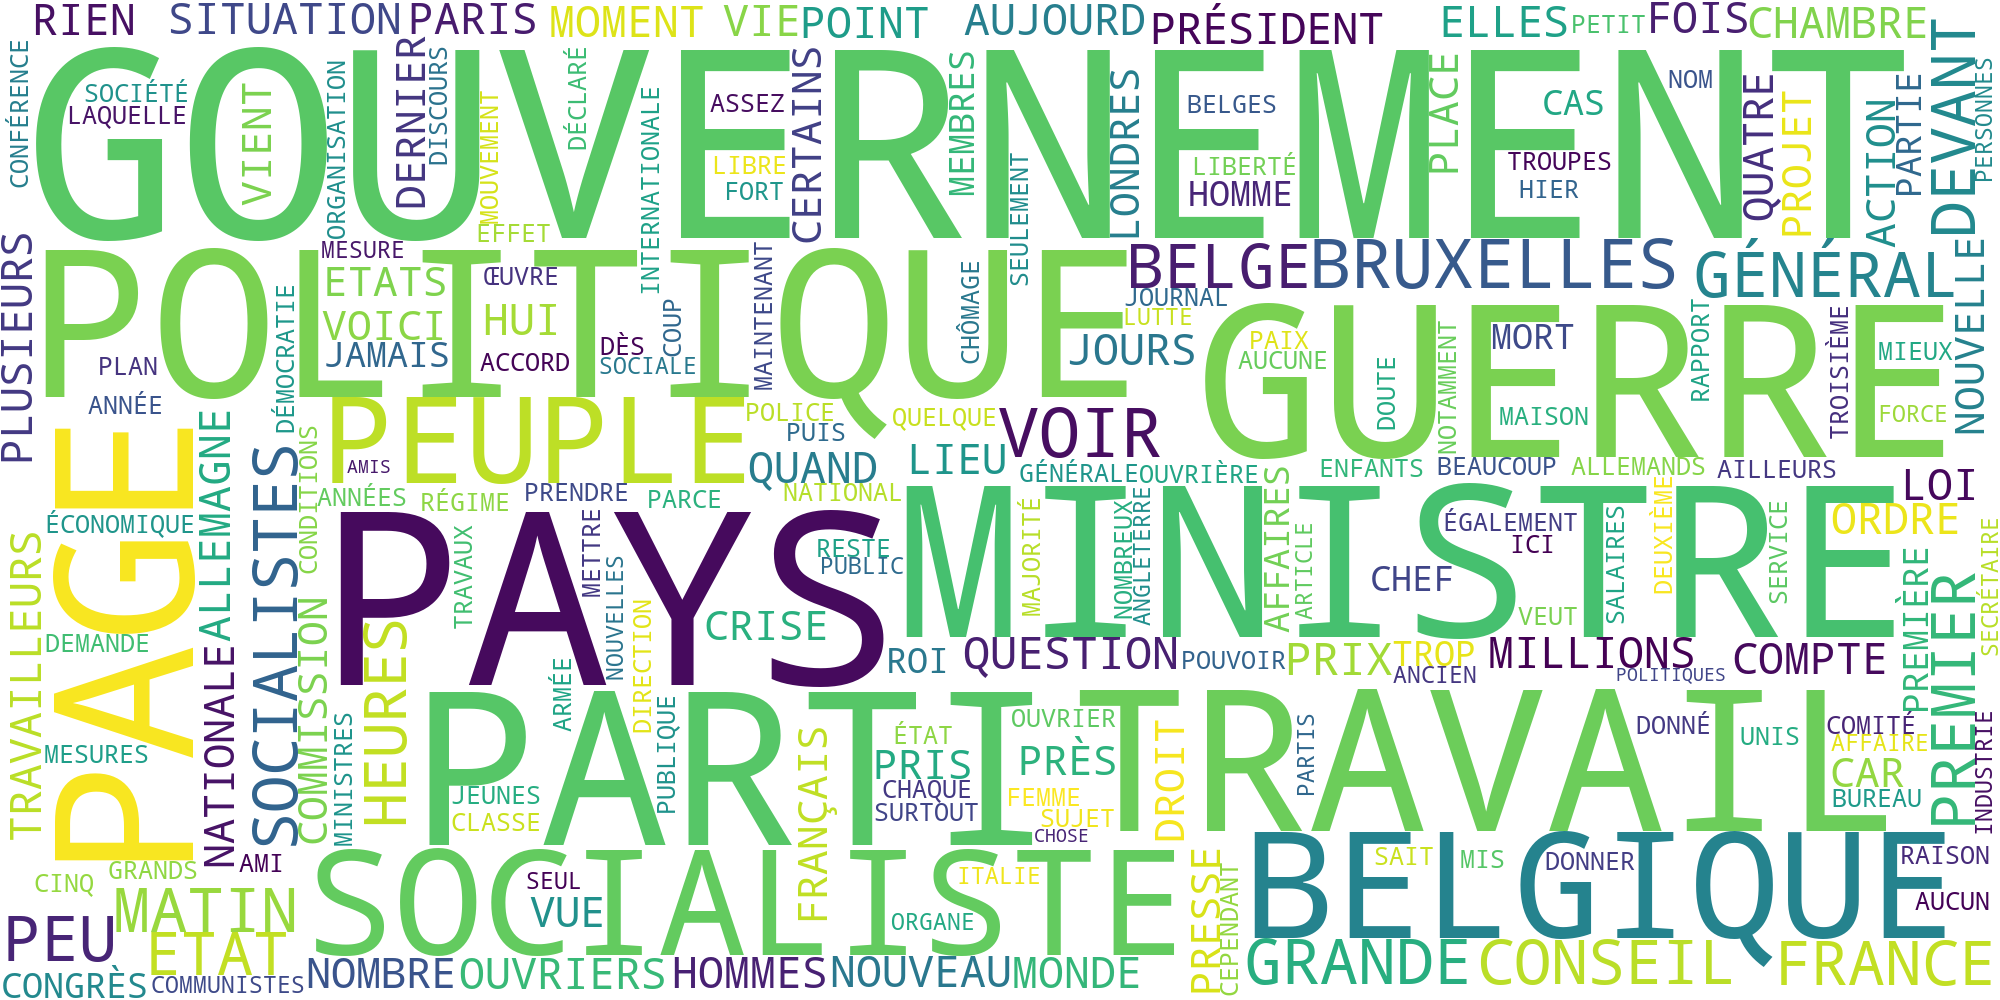

In [120]:
notre_nuage = WordCloud(width=2000, height=1000, background_color='white').generate_from_frequencies(frequencies)
notre_nuage.to_file(os.path.join(path, f"{year}.png"))
Image(filename=os.path.join(path, f"{year}.png"))

In [ ]:
#recherche des entités nommées dans notre corpus
#imports
from collections import defaultdict
import sys
import spacy

In [ ]:
nlp = spacy.load('fr_core_news_md')

In [ ]:
## Charger le texte
n= 100000
text = open("../data/deuxième_partie/1930_clean.txt", encoding="utf-8").read()[:n]

In [ ]:
%%time
# Traiter le texte

doc = nlp(text)

In [ ]:
#compter les entités nommées 
entités = defaultdict(int)
for ent in doc.ents:
    if ent.label_ == "LOC" or "ORG" or "PER" and len(ent.text) > 3:
        entités[ent.text] += 1


sorted_entités = sorted(entités.items(), key=lambda kv: kv[1], reverse=True)

for entité, freq in sorted_entités[:50]:
    print(f"{entité} apparait {freq} fois dans le corpus")

##analyse de sentiments

In [1]:
#imports
import sys
from textblob import Blobber
from textblob_fr import PatternTagger, PatternAnalyzer

In [2]:
#création d'une fonction de détection de sentiments
tb = Blobber(pos_tagger=PatternTagger(), analyzer=PatternAnalyzer())

def get_sentiment(input_text):
    blob = tb(input_text)
    polarity, subjectivity = blob.sentiment
    polarity_perc = f"{100*abs(polarity):.0f}"
    subjectivity_perc = f"{100*subjectivity:.0f}"
    if polarity > 0:
        polarity_str = f"{polarity_perc}% positive"
    elif polarity < 0:
        polarity_str = f"{polarity_perc}% negative"
    else:
        polarity_str = "neutral"
    if subjectivity > 0:
        subjectivity_str = f"{subjectivity}% subjective"
    else:
        subjectivity_str = "perfectly objective"
    print(f"This text is {polarity_str} and {subjectivity_str}.")

analyse de dix phrases triées manuellement

In [3]:
get_sentiment("Elle recrute dans les milieux les plus bas de la colonie italienne des indicateurs ou des complices quand il y a quelque mauvais coup à organiser")

This text is 15% negative and 0.3875% subjective.


In [4]:
get_sentiment("Le gouvernement se contente de faire saisir après parution, de temps à autre, les éditions qui contiennent des articles jugés par trop irrespectueux.")

This text is 10% positive and 0.4333333333333333% subjective.


In [5]:
get_sentiment("Ils appartiennent encore, — malheureusement pour eux, et, j'ajoute, pour nous — à cette catégorie d'animaux que l'on range d'ordinaire parmi les invertébrés.")

This text is 40% negative and 0.22499999999999998% subjective.


In [6]:
get_sentiment("Un arrêté est préparé qui sortira ' bientôt et qui porte le minimum d'élèves par classe de 25 à 35 ans.")

This text is 10% negative and 0.1% subjective.


In [7]:
get_sentiment("Il y est strictement défendu de fumer ou d'allumer une allumette par suite des émanations chimiques qui flottent dans les locaux.")

This text is 2% negative and perfectly objective.


In [8]:
get_sentiment("J'ai exposé les buts de l'action intentée par les ouvriers; le Conseil de la Société a plaidé à son tour.")

This text is neutral and perfectly objective.


In [9]:
get_sentiment("Ce sont les travailleurs eux-mêmes qui, dans leurs organisations syndicales doivent décider de l'attitude à prendre.")

This text is neutral and perfectly objective.


In [10]:
get_sentiment(" Pour atteindre ces limites, il faudra construire pendant une période de cinq ans 102 navires de différents types.")

This text is 14% positive and perfectly objective.


In [11]:
get_sentiment("Il suffit, pour la déjouer, que nous rappelions nettement la position du Parti Ouvrier à l'égard du problè me monétaire, qui est lié à celui de la crise économique.")

This text is neutral and 0.05% subjective.


In [12]:
get_sentiment("Ils ont agi comme les enfants. Et ils ont fait perdre au pays un temps qu'il n'avait pas le moyen de perdre.")

This text is 15% negative and 0.1% subjective.
